## Data Preprocessing
This Jupyter Notebook provides illustrations and use-cases for development process.

__Storer__ is the class that constucts *main dataframe* from \*.csv files provided in /data/ directory.
In case of refreshing data files **Storer** should be called with *reload=True* flag.

Params, coins, times are three main categories (axis) of data space. **Extractor** class allows to load data for single selected crypto and deal with it separately. It's functionality will be illustrated hereinafter.

In [1]:
# Import of necessary libs and our classes
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from cj_loader import Storer, Extractor

We don't need to pass reload flag by default:

In [2]:
storer = Storer()

We can use **storer** object as is for visualizing and dealing with data like this:

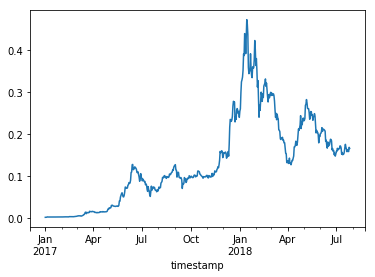

In [3]:
storer.mf['ethereum']['mcap_ratio'].loc['2017-01-01':].plot()


or like this:

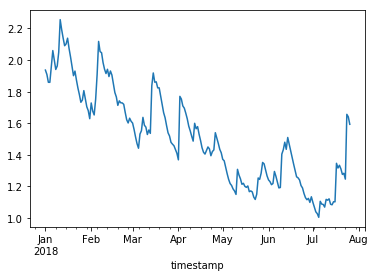

In [4]:
# note the slicing
#        |  coin    |  parameter |   dates_ranges   |
storer.mf['zencash']['volatility'].loc['2018-01-01':].plot()


But the main purpose of **Storer** class is obtaining info over ALL cryptos
For example, this function reveals times when cryptos (from our scope) started their existance.

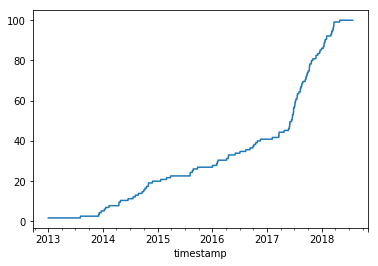

In [5]:
existance_df = storer.prep_existance_plot()
existance_df.loc['2013-01-01':].plot()

The illustration above is very interesting. At least there are two stages with different velocity of new cryptos apeearance. Let's look onto this information from different angle and build the histogram of coins lifetimes distribution.

Text(0.5,1,'Lifetime distribution')

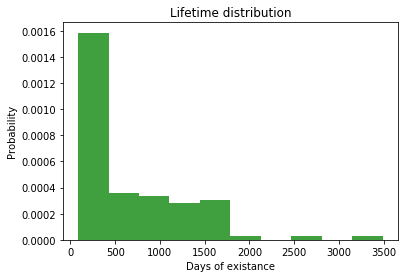

In [6]:
# here is distribution of lifetime in days for all cryptos from our scope
days = [storer.mf[co]['days_exist'][-1] for co in storer.coins]

n, bins, patches = plt.hist(days, 10, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Days of existance')
plt.ylabel('Probability')
plt.title('Lifetime distribution')


Since the main goal of our research is clustering cryptos,
we are going to make a lot of work in frames of each particular crypto's scope. **Extractor** class was developed exactly for this purpose.

After initializing it cuts the data by *time* axis making it statrs from day of appearance of given crypto. Below is method demonstrating coverage of all parameters by NAs. Majority of methods including features extraction are to be implemented as **Exctractor** class methods.

In [7]:
# Example of initializing Extractor class and NAs persistance over different parameters overview
eth = Extractor(storer.mf['ethereum'])
nas = eth.na_distr(silent=False)

active_address      : 0.0
close               : 0.0
high                : 0.0
low                 : 0.0
mcap                : 0.0
mining_difficulty   : 0.0
mining_fees         : 0.0
nva                 : 0.09
nvt                 : 0.09
nvv                 : 0.09
open                : 0.0
txcount             : 0.0
txvolume            : 0.0
volatility          : 0.03
volume              : 0.0
days_exist          : 0.0
rate_btc            : 0.0
mcap_ratio          : 0.0
trad_to_trans_vol   : 0.0
trans_per_address   : 0.0
tx_per_address      : 0.0
mdiff_to_volatility : 0.03
volatility_to_mdiff : 0.03
